In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import os

C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\akshu\AppData\Local\Conti

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\akshu\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [4]:
dataset_path = kagglehub.dataset_download("datamunge/sign-language-mnist")

Resuming download from 29360128 bytes (36273078 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/datamunge/sign-language-mnist?dataset_version_number=1 (29360128/65633206) bytes left.


100%|██████████████████████████████████████████████████████████████████████████████| 62.6M/62.6M [04:01<00:00, 150kB/s]

Extracting model files...


In [6]:
train_csv = os.path.join(dataset_path, "sign_mnist_train.csv")
test_csv = os.path.join(dataset_path, "sign_mnist_test.csv")

In [7]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [8]:
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)

In [9]:
y_test = test_df['label']
X_test = test_df.drop('label', axis=1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [12]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(24, activation='softmax')  # Corrected to 24 classes
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
     

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 27455 samples, validate on 7172 samples
Epoch 1/10
27455/27455 [==============================] - 30s 1ms/sample - loss: 0.0099 - acc: 0.9968 - val_loss: 0.3823 - val_acc: 0.9395
Epoch 2/10
27455/27455 [==============================] - 29s 1ms/sample - loss: 0.0086 - acc: 0.9971 - val_loss: 0.4587 - val_acc: 0.9357
Epoch 3/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0106 - acc: 0.9969 - val_loss: 0.3136 - val_acc: 0.9419
Epoch 4/10
27455/27455 [==============================] - 29s 1ms/sample - loss: 0.0076 - acc: 0.9973 - val_loss: 0.3620 - val_acc: 0.9452
Epoch 5/10
27455/27455 [==============================] - 29s 1ms/sample - loss: 0.0062 - acc: 0.9977 - val_loss: 0.3885 - val_acc: 0.9466
Epoch 6/10
27455/27455 [==============================] - 29s 1ms/sample - loss: 0.0087 - acc: 0.9969 - val_loss: 0.4000 - val_acc: 0.9463
Epoch 7/10
27455/27455 [==============================] - 30s 1ms/sample - loss: 0.0074 - acc: 0.9975 - val_loss: 0.3

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
     

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 27455 samples, validate on 7172 samples
Epoch 1/10
27455/27455 [==============================] - 32s 1ms/sample - loss: 0.0073 - acc: 0.9976 - val_loss: 0.3401 - val_acc: 0.9502
Epoch 2/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0061 - acc: 0.9979 - val_loss: 0.3977 - val_acc: 0.9469
Epoch 3/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0066 - acc: 0.9979 - val_loss: 0.5074 - val_acc: 0.9363
Epoch 4/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0106 - acc: 0.9968 - val_loss: 0.3683 - val_acc: 0.9451
Epoch 5/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0049 - acc: 0.9987 - val_loss: 0.4214 - val_acc: 0.9399
Epoch 6/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0050 - acc: 0.9986 - val_loss: 0.3193 - val_acc: 0.9559
Epoch 7/10
27455/27455 [==============================] - 31s 1ms/sample - loss: 0.0058 - acc: 0.9981 - val_loss: 0.4

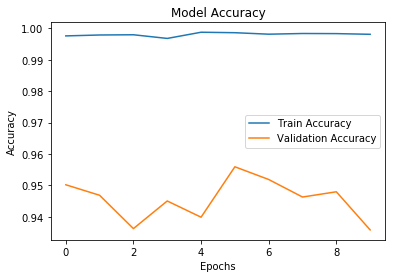

In [27]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()